# Create catalog from Zarr data

In [1]:
import intake

In [5]:
source = intake.open_zarr('/home/jovyan/work/output/TCCON data from Karlsruhe/ka20100419_20201130.public.nc.zarr', decode_times=False)

In [6]:
source.discover()

{'dtype': None,
 'shape': None,
 'npartitions': None,
 'metadata': {'dims': {'time': 57377,
   'ak_P_hPa': 71,
   'ak_zenith': 16,
   'prior_date': 1223,
   'prior_Height': 71},
  'data_vars': {'GFIT_Version': ['time'],
   'GSETUP_Version': ['time'],
   'ak_ch4': ['ak_P_hPa', 'ak_zenith'],
   'ak_co': ['ak_P_hPa', 'ak_zenith'],
   'ak_co2': ['ak_P_hPa', 'ak_zenith'],
   'ak_h2o': ['ak_P_hPa', 'ak_zenith'],
   'ak_hdo': ['ak_P_hPa', 'ak_zenith'],
   'ak_hf': ['ak_P_hPa', 'ak_zenith'],
   'ak_n2o': ['ak_P_hPa', 'ak_zenith'],
   'asza_deg': ['time'],
   'azim_deg': ['time'],
   'day': ['time'],
   'fvsi': ['time'],
   'hour': ['time'],
   'hout_RH': ['time'],
   'lat_deg': ['time'],
   'long_deg': ['time'],
   'pout_hPa': ['time'],
   'prior_Density': ['prior_Height', 'prior_date'],
   'prior_Pressure': ['prior_Height', 'prior_date'],
   'prior_Temp': ['prior_Height', 'prior_date'],
   'prior_ch4': ['prior_Height', 'prior_date'],
   'prior_co': ['prior_Height', 'prior_date'],
   'prior_co

In [13]:
df = source.read_chunked()
df

<xarray.Dataset>
Dimensions:           (time: 57377, ak_P_hPa: 71, ak_zenith: 16,
                       prior_date: 1223, prior_Height: 71)
Coordinates:
  * ak_P_hPa          (ak_P_hPa) float64 1.008e+03 900.9 803.1 ... 0.07 0.06
  * ak_zenith         (ak_zenith) float64 10.0 15.0 20.0 25.0 ... 75.0 80.0 85.0
  * prior_Height      (prior_Height) float64 0.0 1.0 2.0 3.0 ... 68.0 69.0 70.0
  * prior_date        (prior_date) float64 1.472e+04 1.472e+04 ... 1.86e+04
  * time              (time) float64 1.472e+04 1.472e+04 ... 1.86e+04 1.86e+04
Data variables: (12/54)
    GFIT_Version      (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    GSETUP_Version    (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    ak_ch4            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co             (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co2            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_h2o            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ...                ...
    xhf_ppt_error     (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    xn2o_ppb          (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    xn2o_ppb_error    (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    year              (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    zmin_km           (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    zobs_km           (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
Attributes: (12/15)
    Auxiliary_Data_Description:  https://tccon-wiki.caltech.edu/Network_Polic...
    Contact:                     Frank Hase <frank.hase@kit.edu>
    Data_DOI:                    10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
    Data_Reference:              Hase, F., T. Blumenstock, S. Dohe, J. Gro�, ...
    Data_Revision:               R1
    Data_Use_Policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    TCCON_Reference:             Wunch, D., G. C. Toon, J.-F. L. Blavier, R. ...
    creation_date:               2022/01/01
    end_date:                    2020/11/30
    id:                          ka
    longName:                    karlsruhe01
    start_date:                  2010/04/19

In [10]:
print(source.yaml())

sources:
  zarr:
    args:
      decode_times: false
      urlpath: /home/jovyan/work/output/TCCON data from Karlsruhe/ka20100419_20201130.public.nc.zarr
    description: ''
    driver: intake_xarray.xzarr.ZarrSource
    metadata:
      Auxiliary_Data_Description: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy/Auxiliary_Data
      Contact: Frank Hase <frank.hase@kit.edu>
      Data_DOI: 10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
      Data_Reference: "Hase, F., T. Blumenstock, S. Dohe, J. Gro\uFFFD, M. Kiel. 2015.\
        \ TCCON data from Karlsruhe, Germany, Release GGG2014R1. TCCON data archive,\
        \ hosted by CaltechDATA, California Institute of Technology, Pasadena, CA,\
        \ U.S.A. https://doi.org/10.14291/tccon.ggg2014.karlsruhe01.R1/1182416"
      Data_Revision: R1
      Data_Use_Policy: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy
      Location: Karlsruhe, Germany
      More_Information: https://tccon-wiki.caltech.edu
      Softwa

In [18]:
import os
os.getcwd()

'/home/jovyan/work/jupyter'

In [19]:
with open('../intake-catalogs/tccon.yaml', 'w') as f:
    f.write(source.yaml())

# Use catalog to read Zarr data

In [21]:
intake.gui.add('../intake-catalogs/tccon.yaml')

Column(width_policy='max')
    [0] Row(width_policy='max')
        [0] PNG(str)
        [1] Column(width_policy='max')
            [0] Column(name='Select Catalog')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options={'builtin': <Intake catalo...}, size=9, value=[<Intake catalog: tccon>], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='＋', width=50)
                [1] Button(name='―', width=50)
                [2] Toggle(name='🔍', width=50)
        [2] Column(width_policy='max')
            [0] Column(name='Select Data Source')
                [0] Markdown(str, max_height=40)
                [1] MultiSelect(min_width=200, options=OrderedDict([('zarr', ...]), size=9, value=[name: zarr
container: xar...], width_policy='min')
            [1] Row(name='Controls')
                [0] Toggle(name='📊', width=50)
                [1] Toggle(disabled=True, name='⚙', width=50)
        [3] Column(height=240, name='Description', scroll=True, sizing_mode='stretch_width', width_policy='max')
            [0] Markdown(str)
    [1] Row(width_policy='max')
        [0] Row(height_policy='min', max_width=5000, name='Search', width_policy='max')
        [1] Column(max_width=5000, name='Add Catalog', width_policy='max')
        [2] Column(name='Plot', width_policy='max')
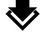

In [22]:
intake.gui

In [27]:
intake.gui.item()

zarr:
  args:
    decode_times: false
    urlpath: /home/jovyan/work/output/TCCON data from Karlsruhe/ka20100419_20201130.public.nc.zarr
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    Auxiliary_Data_Description: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy/Auxiliary_Data
    Contact: Frank Hase <frank.hase@kit.edu>
    Data_DOI: 10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
    Data_Reference: "Hase, F., T. Blumenstock, S. Dohe, J. Gro\uFFFD, M. Kiel. 2015.\
      \ TCCON data from Karlsruhe, Germany, Release GGG2014R1. TCCON data archive,\
      \ hosted by CaltechDATA, California Institute of Technology, Pasadena, CA, U.S.A.\
      \ https://doi.org/10.14291/tccon.ggg2014.karlsruhe01.R1/1182416"
    Data_Revision: R1
    Data_Use_Policy: https://tccon-wiki.caltech.edu/Network_Policy/Data_Use_Policy
    Location: Karlsruhe, Germany
    More_Information: https://tccon-wiki.caltech.edu
    Software_Version: GGG2014
    TCCON_Reference: 'Wunch

In [28]:
intake.gui.item().read_chunked()

<xarray.Dataset>
Dimensions:           (time: 57377, ak_P_hPa: 71, ak_zenith: 16,
                       prior_date: 1223, prior_Height: 71)
Coordinates:
  * ak_P_hPa          (ak_P_hPa) float64 1.008e+03 900.9 803.1 ... 0.07 0.06
  * ak_zenith         (ak_zenith) float64 10.0 15.0 20.0 25.0 ... 75.0 80.0 85.0
  * prior_Height      (prior_Height) float64 0.0 1.0 2.0 3.0 ... 68.0 69.0 70.0
  * prior_date        (prior_date) float64 1.472e+04 1.472e+04 ... 1.86e+04
  * time              (time) float64 1.472e+04 1.472e+04 ... 1.86e+04 1.86e+04
Data variables: (12/54)
    GFIT_Version      (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    GSETUP_Version    (time) object dask.array<chunksize=(2,), meta=np.ndarray>
    ak_ch4            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co             (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_co2            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ak_h2o            (ak_P_hPa, ak_zenith) float64 dask.array<chunksize=(71, 16), meta=np.ndarray>
    ...                ...
    xhf_ppt_error     (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    xn2o_ppb          (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    xn2o_ppb_error    (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    year              (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    zmin_km           (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    zobs_km           (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
Attributes: (12/15)
    Auxiliary_Data_Description:  https://tccon-wiki.caltech.edu/Network_Polic...
    Contact:                     Frank Hase <frank.hase@kit.edu>
    Data_DOI:                    10.14291/tccon.ggg2014.karlsruhe01.R1/1182416
    Data_Reference:              Hase, F., T. Blumenstock, S. Dohe, J. Gro�, ...
    Data_Revision:               R1
    Data_Use_Policy:             https://tccon-wiki.caltech.edu/Network_Polic...
    ...                          ...
    TCCON_Reference:             Wunch, D., G. C. Toon, J.-F. L. Blavier, R. ...
    creation_date:               2022/01/01
    end_date:                    2020/11/30
    id:                          ka
    longName:                    karlsruhe01
    start_date:                  2010/04/19

# Read data from JSON meta data

In [48]:
# https://github.com/intake/intake-xarray/blob/master/intake_xarray/netcdf.py
#json_source = intake.open_zarr('/home/jovyan/work/output/s3/combine.json', combine='auto_combine', xarray_kwargs={'engine': 'zarr'})

json_source = intake.open_netcdf('/home/jovyan/work/output/s3/combine.json', xarray_kwargs={'engine': 'zarr'})

In [49]:
json_source.discover()

FSPathExistNotDir: path exists but is not a directory: %r